*****(A)*****

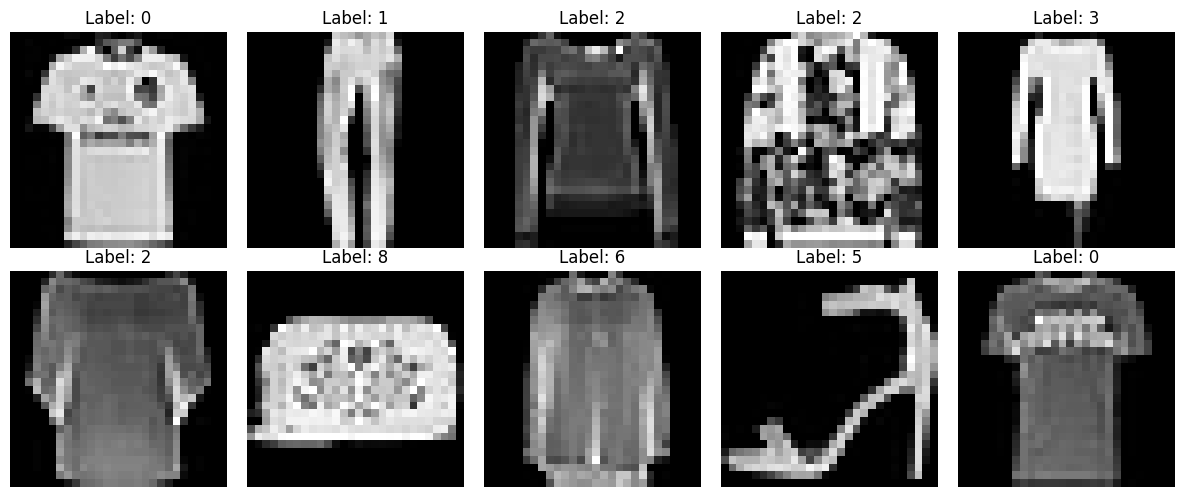

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

# Take the first 8000 samples from the training data and first 2000 from the test data
train_df = train_df.iloc[:8000]
test_df = test_df.iloc[:2000]

# Separate features and labels
train_labels = train_df['label']
train_images = train_df.drop('label', axis=1)
test_labels = test_df['label']
test_images = test_df.drop('label', axis=1)

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Visualize any 10 samples from the test dataset
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.ravel()

for i in range(10):
    image = test_images.iloc[i].values.reshape(28, 28)
    label = test_labels.iloc[i]
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Label: {label}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()


Training with activation function: logistic
Epoch 10/100 - Training Loss: 2.2879 - Validation Loss: 2.2867
Epoch 20/100 - Training Loss: 2.2439 - Validation Loss: 2.2437
Epoch 30/100 - Training Loss: 2.1753 - Validation Loss: 2.1757
Epoch 40/100 - Training Loss: 2.0883 - Validation Loss: 2.0893
Epoch 50/100 - Training Loss: 1.9954 - Validation Loss: 1.9972
Epoch 60/100 - Training Loss: 1.9053 - Validation Loss: 1.9077
Epoch 70/100 - Training Loss: 1.8206 - Validation Loss: 1.8232
Epoch 80/100 - Training Loss: 1.7413 - Validation Loss: 1.7440
Epoch 90/100 - Training Loss: 1.6671 - Validation Loss: 1.6700
Epoch 100/100 - Training Loss: 1.5979 - Validation Loss: 1.6011


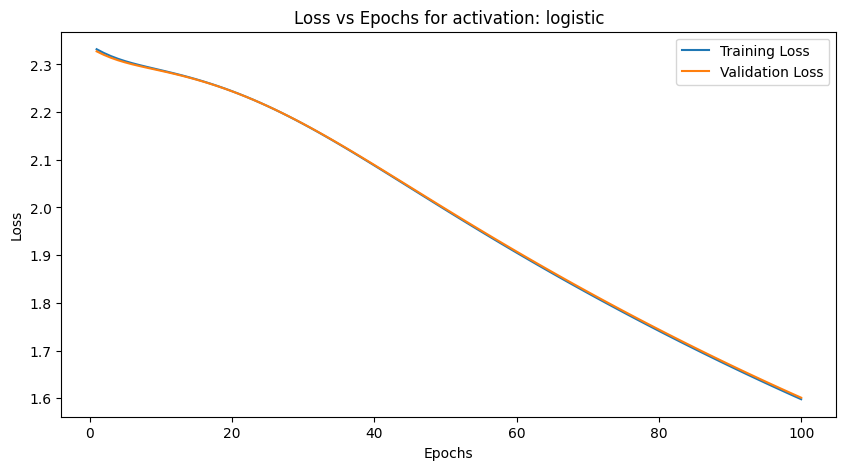

Test Accuracy with activation 'logistic': 0.4460
Training with activation function: tanh
Epoch 10/100 - Training Loss: 1.0086 - Validation Loss: 1.0239
Epoch 20/100 - Training Loss: 0.7548 - Validation Loss: 0.7757
Epoch 30/100 - Training Loss: 0.6338 - Validation Loss: 0.6626
Epoch 40/100 - Training Loss: 0.5608 - Validation Loss: 0.5975
Epoch 50/100 - Training Loss: 0.5116 - Validation Loss: 0.5557
Epoch 60/100 - Training Loss: 0.4757 - Validation Loss: 0.5267
Epoch 70/100 - Training Loss: 0.4481 - Validation Loss: 0.5056
Epoch 80/100 - Training Loss: 0.4258 - Validation Loss: 0.4897
Epoch 90/100 - Training Loss: 0.4072 - Validation Loss: 0.4772
Epoch 100/100 - Training Loss: 0.3911 - Validation Loss: 0.4671


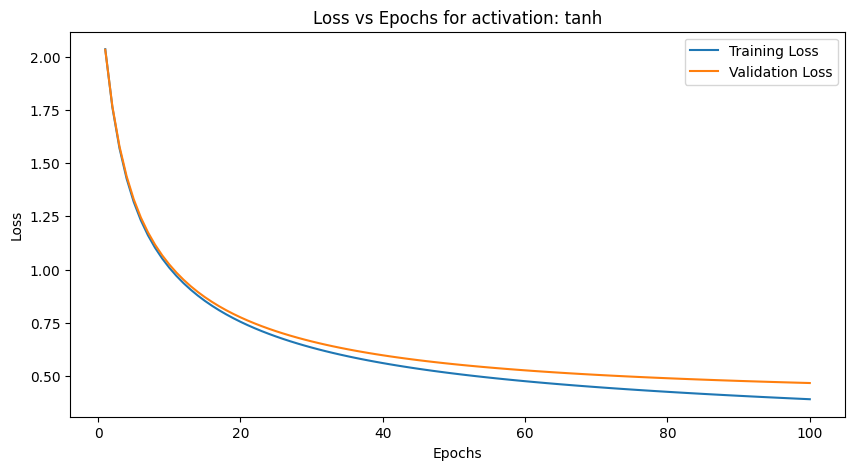

Test Accuracy with activation 'tanh': 0.8360
Training with activation function: relu
Epoch 10/100 - Training Loss: 1.1025 - Validation Loss: 1.1126
Epoch 20/100 - Training Loss: 0.7571 - Validation Loss: 0.7752
Epoch 30/100 - Training Loss: 0.6288 - Validation Loss: 0.6549
Epoch 40/100 - Training Loss: 0.5594 - Validation Loss: 0.5933
Epoch 50/100 - Training Loss: 0.5141 - Validation Loss: 0.5559
Epoch 60/100 - Training Loss: 0.4813 - Validation Loss: 0.5303
Epoch 70/100 - Training Loss: 0.4560 - Validation Loss: 0.5120
Epoch 80/100 - Training Loss: 0.4354 - Validation Loss: 0.4979
Epoch 90/100 - Training Loss: 0.4180 - Validation Loss: 0.4864
Epoch 100/100 - Training Loss: 0.4030 - Validation Loss: 0.4770


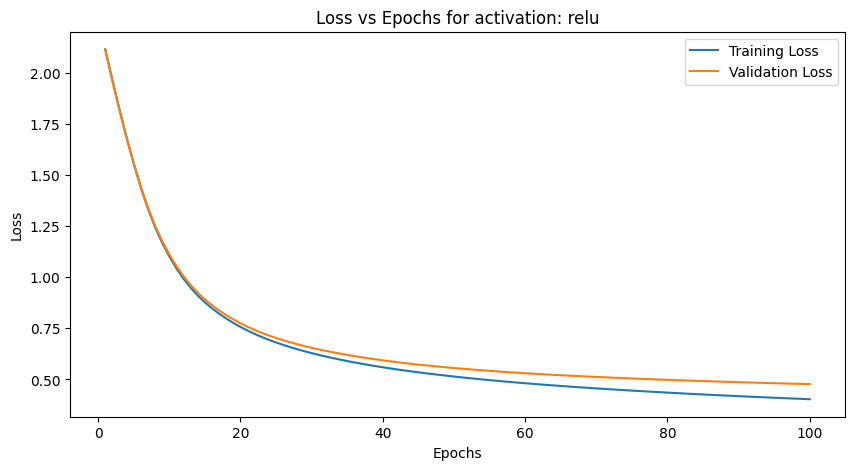

Test Accuracy with activation 'relu': 0.8340
Training with activation function: identity
Epoch 10/100 - Training Loss: 0.7649 - Validation Loss: 0.7889
Epoch 20/100 - Training Loss: 0.5983 - Validation Loss: 0.6331
Epoch 30/100 - Training Loss: 0.5317 - Validation Loss: 0.5758
Epoch 40/100 - Training Loss: 0.4931 - Validation Loss: 0.5446
Epoch 50/100 - Training Loss: 0.4665 - Validation Loss: 0.5248
Epoch 60/100 - Training Loss: 0.4466 - Validation Loss: 0.5110
Epoch 70/100 - Training Loss: 0.4307 - Validation Loss: 0.5011
Epoch 80/100 - Training Loss: 0.4175 - Validation Loss: 0.4937
Epoch 90/100 - Training Loss: 0.4062 - Validation Loss: 0.4881
Epoch 100/100 - Training Loss: 0.3964 - Validation Loss: 0.4839


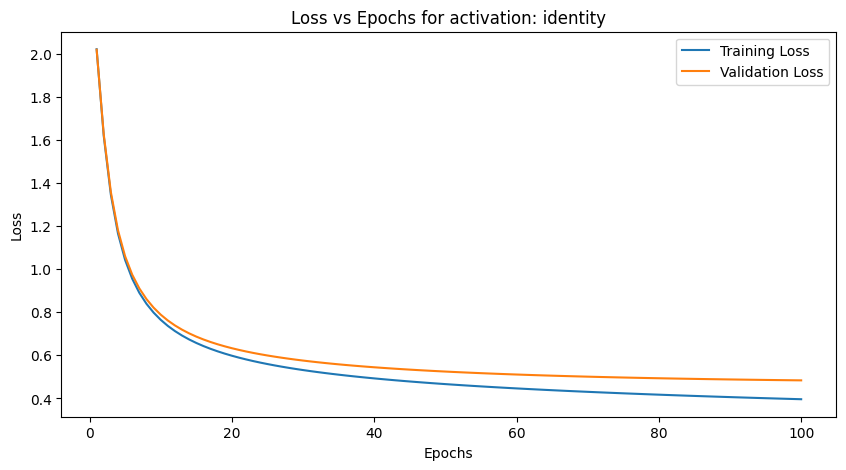

Test Accuracy with activation 'identity': 0.8350

Best activation function: 'tanh' with Test Accuracy: 0.8360


In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import train_test_split
import warnings
from sklearn.exceptions import ConvergenceWarning


# Suppress convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

X_train, X_val, y_train, y_val = train_images,test_images,train_labels, test_labels

# Convert to numpy arrays
X_train = X_train.values
X_val = X_val.values
X_test = test_images.values
y_train = y_train.values
y_val = y_val.values
y_test = test_labels.values

# List of activation functions
activations = ['logistic', 'tanh', 'relu', 'identity']
best_accuracy = 0
best_activation = None

for activation in activations:
    print(f"Training with activation function: {activation}")
    # Initialize MLPClassifier with specified parameters
    mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32),
                        activation=activation,
                        solver='adam',
                        batch_size=128,
                        learning_rate_init=2e-5,
                        max_iter=1,  # We will iterate manually
                        warm_start=True,
                        shuffle=False,
                        random_state=42)
    epochs = 100
    training_loss = []
    validation_loss = []
    for epoch in range(epochs):
        # Fit the model
        mlp.fit(X_train, y_train)
        # Compute training loss
        y_train_prob = mlp.predict_proba(X_train)
        train_loss = log_loss(y_train, y_train_prob)
        training_loss.append(train_loss)
        # Compute validation loss
        y_val_prob = mlp.predict_proba(X_val)
        val_loss = log_loss(y_val, y_val_prob)
        validation_loss.append(val_loss)
        # Optionally, print progress
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1}/{epochs} - Training Loss: {train_loss:.4f} - Validation Loss: {val_loss:.4f}")
    # Plot training and validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, epochs+1), training_loss, label='Training Loss')
    plt.plot(range(1, epochs+1), validation_loss, label='Validation Loss')
    plt.title(f'Loss vs Epochs for activation: {activation}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    # Evaluate on the test set
    y_test_pred = mlp.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy with activation '{activation}': {test_accuracy:.4f}")
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_activation = activation

print(f"\nBest activation function: '{best_activation}' with Test Accuracy: {best_accuracy:.4f}")


In [ ]:
import joblib

# Save the last classifier  with identity function as activation function
joblib.dump(mlp, 'mlp_classifier_part2.pkl')


['mlp_classifier_part2.pkl']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split

# Suppress convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42, stratify=train_labels)

# Convert to numpy arrays
X_train = X_train.values
y_train = y_train.values
X_val = X_val.values
y_val = y_val.values
X_test = test_images.values
y_test = test_labels.values

# Define the parameter grid for grid search
param_grid = {
    'solver': ['lbfgs', 'sgd', 'adam'],
    'learning_rate_init': [0.0001, 0.0002, 0.0005],
    'batch_size': [64, 128, 256],
}

# Initialize the MLPClassifier with the best activation function
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),
    activation='tanh',
    max_iter=100,
    random_state=42
)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring='accuracy',
    n_jobs=-1,
    cv=3,  # 3-fold cross-validation
    verbose=2
)

# Perform grid search
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Evaluate the best model on the validation set
best_model = grid_search.best_estimator_
val_accuracy = best_model.score(X_val, y_val)
print(f"Validation Accuracy with Best Hyperparameters: {val_accuracy:.4f}")

# Evaluate the best model on the test set
test_accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy with Best Hyperparameters: {test_accuracy:.4f}")



Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Hyperparameters:
{'batch_size': 64, 'learning_rate_init': 0.0005, 'solver': 'adam'}
Validation Accuracy with Best Hyperparameters: 0.8562
Test Accuracy with Best Hyperparameters: 0.8465



Training MLPRegressor with activation function: 'relu'
Epoch 1/50 - Training Loss: 0.195065 - Validation Loss: 0.196543
Epoch 10/50 - Training Loss: 0.050852 - Validation Loss: 0.050596
Epoch 20/50 - Training Loss: 0.033653 - Validation Loss: 0.033378
Epoch 30/50 - Training Loss: 0.027444 - Validation Loss: 0.027286
Epoch 40/50 - Training Loss: 0.024764 - Validation Loss: 0.024654
Epoch 50/50 - Training Loss: 0.023147 - Validation Loss: 0.023093


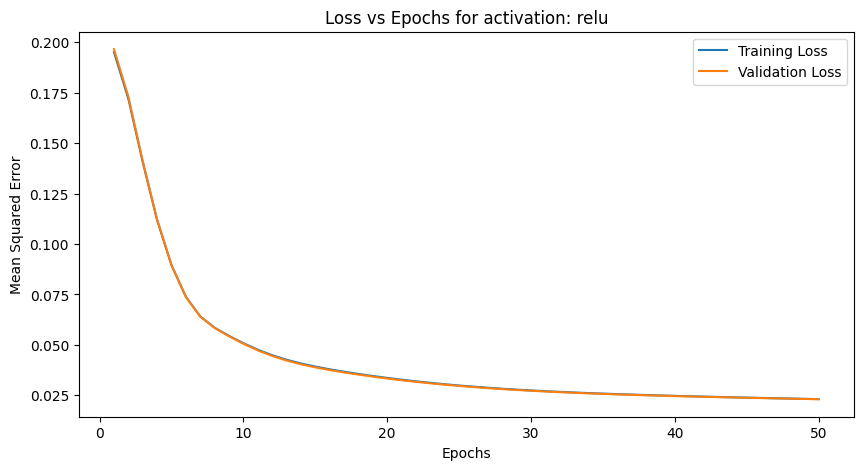

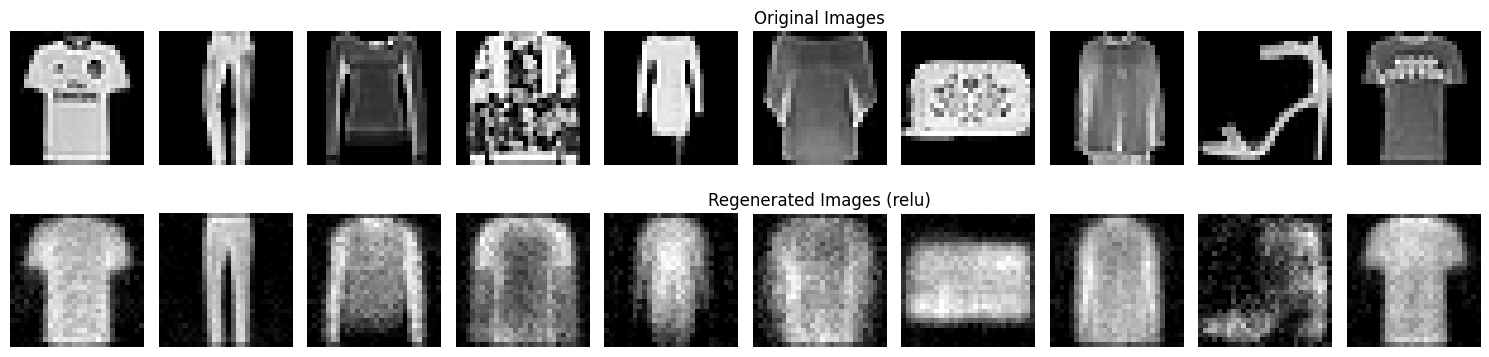


Training MLPRegressor with activation function: 'identity'
Epoch 1/50 - Training Loss: 0.199910 - Validation Loss: 0.201000
Epoch 10/50 - Training Loss: 0.040325 - Validation Loss: 0.040167
Epoch 20/50 - Training Loss: 0.027250 - Validation Loss: 0.027267
Epoch 30/50 - Training Loss: 0.022600 - Validation Loss: 0.022659
Epoch 40/50 - Training Loss: 0.019929 - Validation Loss: 0.020047
Epoch 50/50 - Training Loss: 0.018044 - Validation Loss: 0.018210


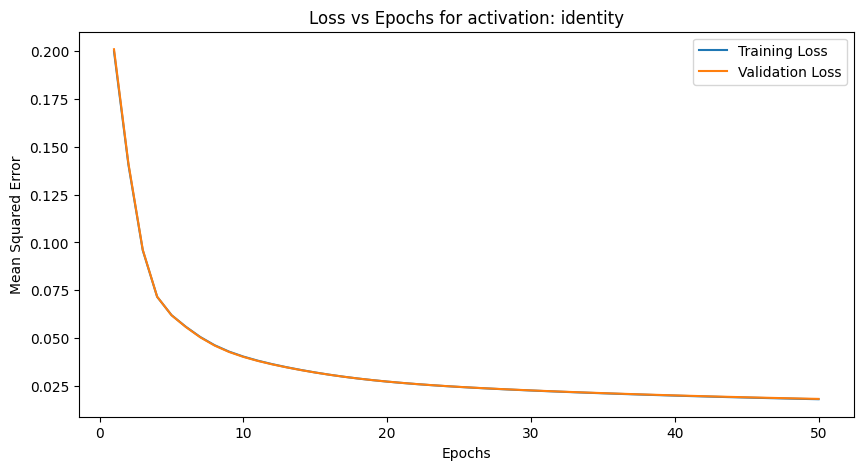

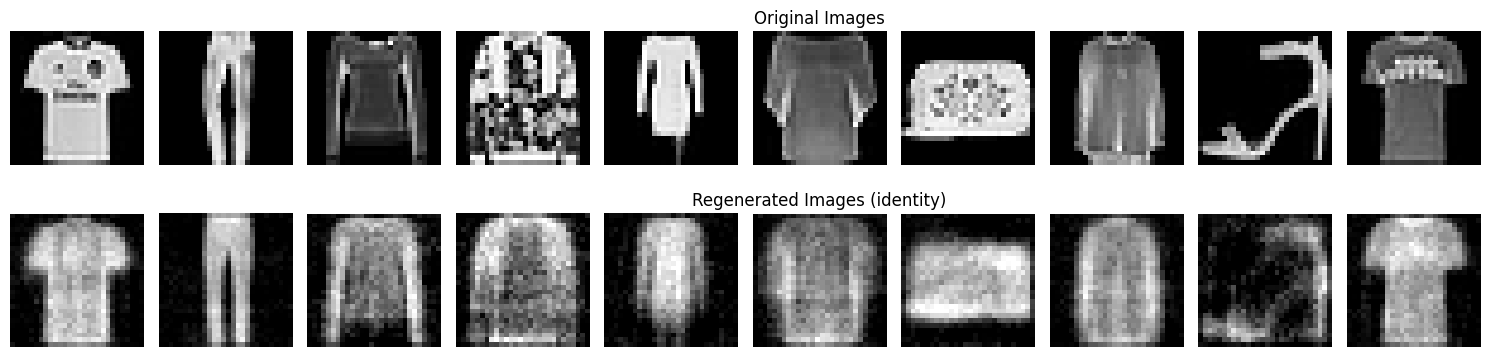


Trained MLPRegressor models saved successfully.


In [9]:


import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.exceptions import ConvergenceWarning
import matplotlib.pyplot as plt
import warnings

# Suppress convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Assuming X_train, X_val, y_train, y_val, X_test are already defined from previous parts

# 2. Define network architecture parameters
c = 512  # c > b > a
b = 256
a = 64
hidden_layer_sizes = [c, b, a, b, c]

# 3. Training parameters
activation_functions = ['relu', 'identity']
learning_rate = 2e-5
epochs = 50  # Adjust as needed

# Dictionaries to store trained models
trained_models = {}

# 4. Train the models
for activation in activation_functions:
    print(f"\nTraining MLPRegressor with activation function: '{activation}'")
    mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes,
                       activation=activation,
                       solver='adam',
                       learning_rate_init=learning_rate,
                       max_iter=1,
                       warm_start=True,
                       random_state=42)
    training_loss = []
    validation_loss = []
    
    for epoch in range(epochs):
        # Fit the model on training data
        mlp.fit(X_train, X_train)
        
        # Record training loss
        train_pred = mlp.predict(X_train)
        train_mse = mean_squared_error(X_train, train_pred)
        training_loss.append(train_mse)
        
        # Compute validation loss
        val_pred = mlp.predict(X_val)
        val_mse = mean_squared_error(X_val, val_pred)
        validation_loss.append(val_mse)
        
        # Optionally, print progress
        if (epoch + 1) % 10 == 0 or epoch == 0:
            print(f"Epoch {epoch+1}/{epochs} - Training Loss: {train_mse:.6f} - Validation Loss: {val_mse:.6f}")
    
    # Plot training and validation loss per epoch
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, epochs+1), training_loss, label='Training Loss')
    plt.plot(range(1, epochs+1), validation_loss, label='Validation Loss')
    plt.title(f'Loss vs Epochs for activation: {activation}')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()
    
    # 5. Visualize regenerated images for test samples
    # Select 10 test samples (same as in part 1)
    num_samples = 10
    test_samples = X_test[:num_samples]
    regenerated_images = mlp.predict(test_samples)
    
    # Plot original and regenerated images side by side
    fig, axes = plt.subplots(nrows=2, ncols=num_samples, figsize=(15, 4))
    
    for i in range(num_samples):
        # Original image
        axes[0, i].imshow(test_samples[i].reshape(28, 28), cmap='gray')
        axes[0, i].axis('off')
        if i == num_samples // 2:
            axes[0, i].set_title('Original Images')
        
        # Regenerated image
        regenerated_image = regenerated_images[i].reshape(28, 28)
        # Clip values to [0,1] range
        regenerated_image = np.clip(regenerated_image, 0, 1)
        axes[1, i].imshow(regenerated_image, cmap='gray')
        axes[1, i].axis('off')
        if i == num_samples // 2:
            axes[1, i].set_title(f'Regenerated Images ({activation})')
    
    plt.tight_layout()
    plt.show()
    
    # Save the trained model
    trained_models[activation] = mlp

# Save the models to disk for later use
import joblib
joblib.dump(trained_models['relu'], 'mlp_regressor_relu.pkl')
joblib.dump(trained_models['identity'], 'mlp_regressor_identity.pkl')
print("\nTrained MLPRegressor models saved successfully.")


In [14]:


import numpy as np
import joblib
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning
import warnings
import joblib
# Suppress convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Function to extract hidden features up to a specified layer
def get_hidden_features(model, X, layer_index=3):
    """
    Extracts the activations from the specified hidden layer.

    Parameters:
    - model: Trained MLPRegressor model.
    - X: Input data (numpy array).
    - layer_index: The index of the layer up to which to extract features.

    Returns:
    - Activations from the specified layer.
    """
    coefs = model.coefs_
    intercepts = model.intercepts_
    activation = model.activation

    for i in range(layer_index):
        X = np.dot(X, coefs[i]) + intercepts[i]
        if i < len(coefs) - 1:
            if activation == 'relu':
                X = np.maximum(0, X)
            elif activation == 'identity':
                pass  # No activation
            elif activation == 'logistic':
                X = 1 / (1 + np.exp(-X))
            elif activation == 'tanh':
                X = np.tanh(X)
            else:
                raise ValueError(f"Unsupported activation: {activation}")
    return X

# Load the trained MLPRegressor models
model_relu = joblib.load('mlp_regressor_relu.pkl')
model_identity = joblib.load('mlp_regressor_identity.pkl')

# Assuming X_train, X_val, X_test, y_train, y_val, y_test are already defined and preprocessed
# If not, ensure to load or preprocess them as done in PART1 and PART2

# Extract feature vectors from the third hidden layer (size 'a' = 64)
features_train_relu = get_hidden_features(model_relu, X_train, layer_index=3)
features_test_relu = get_hidden_features(model_relu, X_test, layer_index=3)

features_train_identity = get_hidden_features(model_identity, X_train, layer_index=3)
features_test_identity = get_hidden_features(model_identity, X_test, layer_index=3)

print("Feature extraction completed successfully.")
# Continuing from PART5.py

# Define training and test features based on the two MLPRegressor models

# For 'relu' activation
X_train_features_relu = features_train_relu
X_test_features_relu = features_test_relu

# For 'identity' activation
X_train_features_identity = features_train_identity
X_test_features_identity = features_test_identity

# Define the MLPClassifier parameters
classifier_params = {
    'hidden_layer_sizes': (64, 64),
    'solver': 'adam',
    'learning_rate_init': 2e-5,
    'max_iter': 200,
    'random_state': 42
}

# Initialize and train the first MLPClassifier (from 'relu' features)
print("\nTraining MLPClassifier with features from MLPRegressor ('relu' activation)")
clf_relu = MLPClassifier(**classifier_params)
clf_relu.fit(X_train_features_relu, y_train)

# Initialize and train the second MLPClassifier (from 'identity' features)
print("\nTraining MLPClassifier with features from MLPRegressor ('identity' activation)")
clf_identity = MLPClassifier(**classifier_params)
clf_identity.fit(X_train_features_identity, y_train)
# After determining 'best_activation' and 'best_accuracy' in Part 2

import joblib

# Save the best classifier
joblib.dump(clf_identity, 'clf_identity.pkl')
joblib.dump(clf_relu, 'clf_relu.pkl')

print("\nTraining of both MLPClassifiers completed successfully.")


Feature extraction completed successfully.

Training MLPClassifier with features from MLPRegressor ('relu' activation)

Training MLPClassifier with features from MLPRegressor ('identity' activation)

Training of both MLPClassifiers completed successfully.


In [13]:
# Part 6: Compare MLP Classifiers from Part 2 and Part 5

import joblib
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the best MLPClassifier from Part 2
clf_part2 = joblib.load('mlp_classifier_part2.pkl')
print("Loaded Part 2 MLPClassifier.")

# Load the classifiers from Part 5 (assuming you have saved them)
clf_relu = joblib.load('clf_relu.pkl')
print("Loaded Part 5 MLPClassifier trained on 'relu' features.")

clf_identity = joblib.load('clf_identity.pkl')
print("Loaded Part 5 MLPClassifier trained on 'identity' features.")


# For clf_part2: trained on raw data
y_pred_part2 = clf_part2.predict(X_test)
accuracy_part2 = accuracy_score(y_test, y_pred_part2)

# For clf_relu: trained on 'relu' features
y_pred_relu = clf_relu.predict(X_test_features_relu)
accuracy_relu = accuracy_score(y_test, y_pred_relu)

# For clf_identity: trained on 'identity' features
y_pred_identity = clf_identity.predict(X_test_features_identity)
accuracy_identity = accuracy_score(y_test, y_pred_identity)

# Print the accuracies
print("\nTest Accuracies:")
print(f"Part 2: MLPClassifier on raw data: {accuracy_part2:.4f}")
print(f"Part 5: MLPClassifier on 'relu' features: {accuracy_relu:.4f}")
print(f"Part 5: MLPClassifier on 'identity' features: {accuracy_identity:.4f}")




Loaded Part 2 MLPClassifier.
Loaded Part 5 MLPClassifier trained on 'relu' features.
Loaded Part 5 MLPClassifier trained on 'identity' features.

Test Accuracies:
Part 2: MLPClassifier on raw data: 0.8350
Part 5: MLPClassifier on 'relu' features: 0.7355
Part 5: MLPClassifier on 'identity' features: 0.7850
